##`Experiment 1`

In [1]:
#get data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

import zipfile
zip_ref=zipfile.ZipFile("10_food_classes_1_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-04 05:14:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 74.125.137.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   206MB/s    in 0.6s    

2021-06-04 05:14:06 (206 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



Data augmentation layer as we know most of the preprocessing happens on CPU of the machine.`tensorflow.keras.ImageDataGenerator` also generate data on the fly but on CPU of the machine which takes significant amount of time while training.


Tensorflow comes with `tensorflow.kears.layers.experimental.preprocessing` which we can add in our model.

Benefits of using preprocesing layer for data augmentation is tha:
* Pre-processing will happen on GPU resulting in faster training time
* This layer will be off automatically at the time of back proagation and inference time(or at the time of evaluation) so that test data will not get aurmented.
* With Keras preprocessing layers, you can build and export models that are truly end-to-end: models that accept raw images or raw structured data as input; models that handle feature normalization or feature value indexing on their own.


In [2]:
#load data
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32

train_dir="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"


from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data_1_percent=image_dataset_from_directory(train_dir,
                                                   image_size=IMAGE_SHAPE,
                                                   batch_size=BATCH_SIZE,
                                                   label_mode="categorical"
                                                   )

test_data=image_dataset_from_directory(test_dir,
                                                  image_size=IMAGE_SHAPE,
                                                  batch_size=BATCH_SIZE,
                                                  label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [3]:
from tensorflow.keras.layers.experimental import preprocessing

In [4]:
import tensorflow as tf
tf.random.set_seed(42)

In [5]:
data_augmentation=tf.keras.Sequential([
                       preprocessing.RandomFlip("horizontal"),
                       #preprocessing.Rescaling(1/255.),
                       preprocessing.RandomZoom(0.2),
                       preprocessing.RandomContrast(0.2),
                       preprocessing.RandomRotation(0.2),
                       preprocessing.RandomHeight(0.2),
                       preprocessing.RandomWidth(0.2)                
])

In [6]:
INPUT_SHAPE=(224,224,3)
num_Classes=10

#createmodel using functional api

inputs=tf.keras.Input(shape=INPUT_SHAPE)

#add data augmentation layer
x=data_augmentation(inputs)

#add efficientnet layer
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

x=base_model(x,training=False)

#create output layer
x=tf.keras.layers.GlobalAveragePooling2D()(x)

outputs=tf.keras.layers.Dense(10,activation="softmax")(x)

model_1=tf.keras.Model(inputs,outputs)

model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1=model_1.fit(train_data_1_percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_1_percent),
                      validation_steps=len(test_data),
                      validation_data=test_data)

16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/5
3/3 [==============================] - 45s 5s/step - loss: 2.3958 - accuracy: 0.0857 - val_loss: 2.3461 - val_accuracy: 0.1164
Epoch 2/5
3/3 [==============================] - 9s 4s/step - loss: 2.1675 - accuracy: 0.2143 - val_loss: 2.2102 - val_accuracy: 0.1892
Epoch 3/5
3/3 [==============================] - 9s 4s/step - loss: 1.9536 - accuracy: 0.3714 - val_loss: 2.0971 - val_accuracy: 0.2680
Epoch 4/5
3/3 [==============================] - 9s 4s/step - loss: 1.7977 - accuracy: 0.5286 - val_loss: 1.9952 - val_accuracy: 0.3332
Epoch 5/5
3/3 [==============================] - 10s 5s/step - loss: 1.6582 - accuracy: 0.5714 - val_loss: 1.9027 - val_accuracy: 0.3772


In [7]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


##`Experiment 2`
Carry out above experiment with 10% of data

In [8]:
#Lets download data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-06-04 05:15:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 74.125.137.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   107MB/s    in 1.5s    

2021-06-04 05:15:45 (107 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [9]:
zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [10]:
#create batches
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"
train_data_10_percent=image_dataset_from_directory(train_dir,
                                                   image_size=(224,224),
                                                   label_mode="categorical",
                                                   batch_size=32)

test_data=image_dataset_from_directory(test_dir,
                                      image_size=(224,224),
                                      batch_size=32,
                                      label_mode="categorical")



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
#create data augmentation layer
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation=tf.keras.Sequential([
  preprocessing.RandomContrast(0.3),
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2)                                       
])

In [12]:
#create model2 

#get base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#create input layer
inputs=tf.keras.Input(shape=(224,224,3))

#pass input to data aug layer
x=data_augmentation(inputs)

#pass output of data aug layer to base model and keep training false(we dont want to train batch norm layers)
x=base_model(x,training=False)

#pass output of base model features to global average pooling layer
x=tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)

#create dense layer for classification
outputs=tf.keras.layers.Dense(10,activation="softmax")(x)


#create keras Model
model_2=tf.keras.Model(inputs,outputs)

#compile model
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model on 10% data
history_2=model_2.fit(train_data_10_percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data,
                      validation_steps=len(test_data))




Epoch 1/5
24/24 [==============================] - 24s 825ms/step - loss: 1.9875 - accuracy: 0.3400 - val_loss: 1.4583 - val_accuracy: 0.6644
Epoch 2/5
24/24 [==============================] - 16s 679ms/step - loss: 1.3695 - accuracy: 0.6480 - val_loss: 1.0512 - val_accuracy: 0.7532
Epoch 3/5
24/24 [==============================] - 16s 680ms/step - loss: 1.0922 - accuracy: 0.7400 - val_loss: 0.8765 - val_accuracy: 0.7788
Epoch 4/5
24/24 [==============================] - 16s 657ms/step - loss: 0.9314 - accuracy: 0.7627 - val_loss: 0.7671 - val_accuracy: 0.8012
Epoch 5/5
24/24 [==============================] - 15s 635ms/step - loss: 0.8250 - accuracy: 0.7840 - val_loss: 0.7006 - val_accuracy: 0.8124


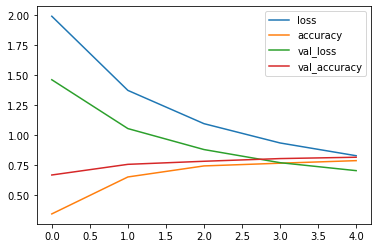

In [13]:
import pandas as pd
pd.DataFrame(history_2.history).plot()

In [14]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avg_pooling_layer (Gl (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


##`creating model checkpoint callback`


ModelCheckpoint callback intemediately saves our model (full model or just weights) during training. 

In [15]:
from tensorflow.keras.layers.experimental import preprocessing

In [16]:
#create data augmentation layer

data_augmentation=tf.keras.Sequential([
      preprocessing.RandomContrast(0.2),
      preprocessing.RandomFlip("horizontal"),
      preprocessing.RandomWidth(0.2),
      preprocessing.RandomHeight(0.2),
      preprocessing.RandomZoom(0.2),
      preprocessing.RandomRotation(0.2)
])

In [17]:
#build new model

base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.Input(shape=(224,224,3))

x=data_augmentation(inputs)

x=base_model(x,training=False)

#create global average pooling layer
x=tf.keras.layers.GlobalAveragePooling2D(name="global_avgpooling_layer")(x)

#create output dense layer
outputs=tf.keras.layers.Dense(10,activation="softmax")(x)

#create keras Model
model_3=tf.keras.Model(inputs,outputs)


#compile model
model_3.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [18]:
checkpoint_path="modelcheckpoint_10_percent/checkpoint.ckpt"

earlystopping_callback=tf.keras.callbacks.EarlyStopping(patience=2,monitor="val_loss")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor="val_loss",
                                                       save_freq="epoch",
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       verbose=1)


In [19]:
history_3=model_3.fit(train_data_10_percent,
            epochs=10,
            validation_data=test_data,
            validation_steps=len(test_data),
            steps_per_epoch=len(train_data_10_percent),
            callbacks=[earlystopping_callback,checkpoint_callback])

Epoch 1/10
24/24 [==============================] - 21s 675ms/step - loss: 2.0247 - accuracy: 0.3027 - val_loss: 1.5088 - val_accuracy: 0.6304

Epoch 00001: saving model to modelcheckpoint_10_percent/checkpoint.ckpt
Epoch 2/10
24/24 [==============================] - 15s 614ms/step - loss: 1.3907 - accuracy: 0.6480 - val_loss: 1.0756 - val_accuracy: 0.7564

Epoch 00002: saving model to modelcheckpoint_10_percent/checkpoint.ckpt
Epoch 3/10
24/24 [==============================] - 15s 627ms/step - loss: 1.1028 - accuracy: 0.7160 - val_loss: 0.8798 - val_accuracy: 0.7788

Epoch 00003: saving model to modelcheckpoint_10_percent/checkpoint.ckpt
Epoch 4/10
24/24 [==============================] - 14s 585ms/step - loss: 0.9173 - accuracy: 0.7640 - val_loss: 0.7675 - val_accuracy: 0.7936

Epoch 00004: saving model to modelcheckpoint_10_percent/checkpoint.ckpt
Epoch 5/10
24/24 [==============================] - 14s 586ms/step - loss: 0.8217 - accuracy: 0.7920 - val_loss: 0.7022 - val_accuracy: 

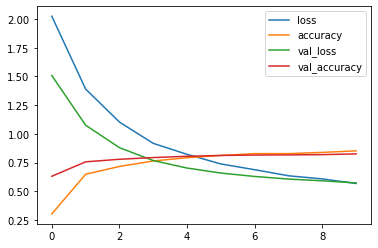

In [20]:
import pandas as pd
pd.DataFrame(history_3.history).plot()

###### **Note** : save() saves the weights and the model structure to a single HDF5 file. ... Then you can use that HDF5 file with load() to reconstruct the whole model, including weights. save_weights() only saves the weights to HDF5 and nothing else. You need extra code to reconstruct the model from a JSON file.

When training deep learning models, the checkpoint is the weights of the model. These weights can be used to make predictions as is, or used as the basis for ongoing training

#### loading in checkpointed weights -returns a model to specific checkpoint


In [27]:
evaluate_model_3=model_3.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.5727 - accuracy: 0.8256


In [28]:
evaluate_model_3

[0.572659432888031, 0.8256000280380249]

In [29]:
#load model weights
pathToModel="modelcheckpoint_10_percent/checkpoint.ckpt"
model_3.load_weights(pathToModel) #reloads the weights from checpoint file 
evaluate_loadedmodel=model_3.evaluate(test_data)


79/79 [==============================] - 9s 105ms/step - loss: 0.5727 - accuracy: 0.8256


In [30]:
evaluate_loadedmodel

[0.572659432888031, 0.8256000280380249]

In [31]:
evaluate_loadedmodel==evaluate_model_3

True